In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time 
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
import scipy.stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import optuna
#from xgboost import XGBRegressor
#from pycaret.regression import setup, compare_models, models
from scipy import stats
from scipy.stats import boxcox
from scipy.special import boxcox1p
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Load the data

In [2]:
df_train = pd.read_csv('Ames_Housing_Price_Data.csv',index_col=0)

In [3]:
df_raw=df_train.copy()

## Examine the data

In [4]:
df_train.shape

(2580, 81)

In [5]:
df_train.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,2fmCon,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,N,SBrkr,936,0,0,0.0,0.0,1,0,2,1,TA,4,Min2,0,NaN,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2007.0,Fin,2.0,428.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,6,1984,1984,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,647.0,Unf,0.0,217.0,864.0,GasA,TA,Y,SBrkr,889,0,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1984.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
10,

In [6]:
#Check the number of NAs in each column
df_train.isna().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF  

# Data Cleaning/Preprocessing

In [7]:
target=df_train.SalePrice

In [8]:
test_ids=df_train.PID

In [9]:
df_train=df_train.drop(columns=['PID', 'SalePrice'])

In [10]:
df_train_copy=df_train.copy()

### Use .info() to see length and dtypes

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   MSSubClass     2580 non-null   int64  
 2   MSZoning       2580 non-null   object 
 3   LotFrontage    2118 non-null   float64
 4   LotArea        2580 non-null   int64  
 5   Street         2580 non-null   object 
 6   Alley          168 non-null    object 
 7   LotShape       2580 non-null   object 
 8   LandContour    2580 non-null   object 
 9   Utilities      2580 non-null   object 
 10  LotConfig      2580 non-null   object 
 11  LandSlope      2580 non-null   object 
 12  Neighborhood   2580 non-null   object 
 13  Condition1     2580 non-null   object 
 14  Condition2     2580 non-null   object 
 15  BldgType       2580 non-null   object 
 16  HouseStyle     2580 non-null   object 
 17  OverallQual    2580 non-null   int64  
 18  OverallCo

## Identify numerical and categorical variables

In [12]:
cols_list=list(df_train.columns)
cols_list

['GrLivArea',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [13]:
#MSSUBClass is actually a categoical data coluumn per the data descrpition text file
df_train.MSSubClass=df_train.MSSubClass.astype(str)

In [14]:
#looking at columns that consist of numberic values only
df_train.select_dtypes("number")
#df_train._get_numeric_data()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,856,NaN,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
2,1049,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
3,1001,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007
4,1039,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009
5,1665,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,NaN,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5,2009
760,1733,NaN,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,6,2009
761,2002,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007
762,1842,NaN,8826,7,5,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,486.0,193,96,0,0,0,0,0,7,2007


# (Moved to later) Remove features based on correlation to avoid multicollinearity 

In [15]:
#corr=df_train.corr()
#plt.figure(figsize = (16, 16))
#sns.heatmap(corr,
#           xticklabels=corr.columns.values,
#           yticklabels=corr.columns.values, cmap="Blues")

#plt.title('Heatmap of Correlation Matrix')
#corr

In [16]:
#high_corr_pairs = np.where(abs(corr) > 0.7)
#high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs)
                                        #if x != y and x < y]
#high_corr_pairs

### Per the data description, 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

TotalBsmtSF=BsmtFinSF1+BsmtFinSF2+BsmtUnfSF

GrLivArea=1stFlrSF+2ndFlrSF+LowQualFinSF

In [17]:
#Dropping numerical columns of which have high correaltion with one another
#df_train=df_train.drop(["TotRmsAbvGrd","GarageYrBlt","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF"],axis=1)

## Data Inputation

### Categorical

In [18]:
#Show all column names with missing values
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [19]:
#Show all categorical/object columns with missing values
df_train.select_dtypes("object").isna().sum()!=0

MSSubClass       False
MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleConditi

In [20]:
#Fill NAs in these columns with None when a missing value means something
#e.g. NA basement means no basement

for column in ["Alley",
               "MasVnrType",
               "BsmtQual",
               "BsmtCond",
               "BsmtExposure",
               "BsmtFinType1",
               "BsmtFinType2",
               "FireplaceQu",
               "GarageType",
               "GarageFinish",
               "GarageQual",
               "GarageCond",
               "PoolQC",
               "Fence",
               "MiscFeature"]:
    df_train[column]=df_train[column].fillna("None")

In [21]:
#Fill NAs in these columns with mode
for column in ["MasVnrType","Electrical"]:
    df_train[column]=df_train[column].fillna(df_train[column].mode()[0])

In [22]:
df_train.select_dtypes("object").isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## Numerical

In [23]:
df_train.select_dtypes("number").isna().sum()

GrLivArea          0
LotFrontage      462
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        14
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      129
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [24]:
#Show all numeric columns with missing values
df_train.select_dtypes("number").isna().sum()!=0

GrLivArea        False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
BsmtFullBath      True
BsmtHalfBath      True
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [25]:
for column in ["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"]:
    df_train[column]=df_train[column].fillna(df_train[column].median())

In [26]:
for column in ["GarageYrBlt"]:
    df_train[column]=df_train[column].fillna(df_train[column].mode()[0])

In [27]:
df_train.groupby("Neighborhood").LotFrontage.median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.5
ClearCr    81.0
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    72.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    70.0
Somerst    72.0
StoneBr    60.0
Timber     81.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [28]:
df_train.loc[df_train["Neighborhood"].isin(['Landmrk','GrnHill'])]

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
110,1502,120,RM,NaN,9763,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,9,2007,WD,Normal
684,1295,120,RM,NaN,8239,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,11,2006,WD,Normal
205,1320,160,RH,NaN,3612,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,TA,5,Typ,0,None,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,None,MnPrv,None,0,6,2006,WD,Normal


In [29]:
#Impute missing values in LotFrontage with the median by Neighborhood 
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train.groupby("Neighborhood")['LotFrontage'].transform('median'))

In [30]:
#Fill the remaining 3NAs of LotFrontage with the Median of all LotFrontage
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())

In [31]:
df_train.select_dtypes("number").isna().sum()

GrLivArea        0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [ ]:
df_train.isna().sum()
#Check if there're still any missing values

## Summarize numberical and categorical variables separately

In [ ]:
df_train.describe(include=[np.number])

In [ ]:
df_train.describe(include=['O']) #The 'O' stands for objects

# Feature Transformations

In [35]:
df_train.select_dtypes("number")

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,856,60.0,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
2,1049,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
3,1001,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007
4,1039,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009
5,1665,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,51.5,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5,2009
760,1733,65.0,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,6,2009
761,2002,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007
762,1842,70.0,8826,7,5,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,486.0,193,96,0,0,0,0,0,7,2007


In [36]:
numeric_cols=df_train.select_dtypes("number").columns

In [37]:
numeric_cols=pd.DataFrame(numeric_cols,columns=["Features"])

In [38]:
numeric_cols

,Features
0,GrLivArea
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,BsmtFinSF1
9,BsmtFinSF2


In [39]:
scipy.stats.skew(df_train.select_dtypes("number"))

array([ 0.97949483,  1.13817613, 13.06594054,  0.18699771,  0.62435313,
       -0.59782952, -0.43714372,  2.67256246,  0.80273372,  3.98997942,
        0.9625029 ,  0.51510019,  1.04310374,  0.82088649, 13.2527728 ,
        0.52862064,  3.7903816 ,  0.20599242,  0.66962427,  0.25366172,
        4.5286104 ,  0.66871261,  0.73477173, -0.68329032, -0.19127454,
        0.2468711 ,  1.84594824,  2.6037833 ,  4.03944974, 11.82338566,
        3.98830739, 19.8851274 , 21.27686429,  0.23279759,  0.09292702])

In [40]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew
#0 means no skew and normally distributed
#+ve number means right skew
#-ve number means left skew

,Features,Skewness
0,GrLivArea,0.979495
1,LotFrontage,1.138176
2,LotArea,13.065941
3,OverallQual,0.186998
4,OverallCond,0.624353
5,YearBuilt,-0.597830
6,YearRemodAdd,-0.437144
7,MasVnrArea,2.672562
8,BsmtFinSF1,0.802734
9,BsmtFinSF2,3.989979


In [41]:
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])

In [42]:
df_skew

,Features,Skewness,Absolute_Skew
0,GrLivArea,0.979495,0.979495
1,LotFrontage,1.138176,1.138176
2,LotArea,13.065941,13.065941
3,OverallQual,0.186998,0.186998
4,OverallCond,0.624353,0.624353
5,YearBuilt,-0.597830,0.597830
6,YearRemodAdd,-0.437144,0.437144
7,MasVnrArea,2.672562,2.672562
8,BsmtFinSF1,0.802734,0.802734
9,BsmtFinSF2,3.989979,3.989979


In [43]:
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)

In [44]:
#Looks like half of the features are skewed.... (Absolute Skew>0.75)
df_skew.sort_values("Absolute_Skew")

,Features,Skewness,Absolute_Skew,Skewed
34,YrSold,0.092927,0.092927,False
3,OverallQual,0.186998,0.186998,False
24,GarageCars,-0.191275,0.191275,False
17,FullBath,0.205992,0.205992,False
33,MoSold,0.232798,0.232798,False
25,GarageArea,0.246871,0.246871,False
19,BedroomAbvGr,0.253662,0.253662,False
6,YearRemodAdd,-0.437144,0.437144,False
11,TotalBsmtSF,0.515100,0.515100,False
15,BsmtFullBath,0.528621,0.528621,False


In [45]:
df_skew[df_skew.Skewed==True].Features.values
#get all the features which are skewed

array(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype=object)

In [46]:
df_skew[df_skew.Skewed==True].Features

0         GrLivArea
1       LotFrontage
2           LotArea
7        MasVnrArea
8        BsmtFinSF1
9        BsmtFinSF2
10        BsmtUnfSF
12         1stFlrSF
13         2ndFlrSF
14     LowQualFinSF
16     BsmtHalfBath
20     KitchenAbvGr
26       WoodDeckSF
27      OpenPorchSF
28    EnclosedPorch
29        3SsnPorch
30      ScreenPorch
31         PoolArea
32          MiscVal
Name: Features, dtype: object

In [47]:
#Check to see how those skewed columns are distributed
df_train[df_skew[df_skew.Skewed==True].Features.values].describe()

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,1486.039922,68.868798,10120.153488,98.769380,444.322868,53.218217,539.066279,1144.975194,336.820155,4.244574,0.062016,1.04031,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395
std,488.650181,21.134646,8126.937892,175.546045,429.253356,174.393251,425.120979,375.958955,424.072452,44.403603,0.244424,0.20255,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058
min,334.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1112.000000,60.000000,7406.750000,0.000000,0.000000,0.000000,215.000000,871.750000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1436.000000,70.000000,9391.000000,0.000000,384.000000,0.000000,448.000000,1071.000000,0.000000,0.000000,0.000000,1.00000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1733.000000,80.000000,11494.000000,157.000000,732.000000,0.000000,784.000000,1364.000000,703.000000,0.000000,0.000000,1.00000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4676.000000,313.000000,215245.000000,1600.000000,2288.000000,1526.000000,2336.000000,3820.000000,1872.000000,1064.000000,2.000000,3.00000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000


In [48]:
df_before_feature_transformed=df_train.copy()

In [49]:
df_skewed_features=df_train[df_skew[df_skew.Skewed==True].Features.values]
df_skewed_features

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,856,60.0,7890,0.0,238.0,0.0,618.0,856,0,0,0.0,1,0,0,0,0,166,0,0
2,1049,42.0,4235,149.0,552.0,393.0,104.0,1049,0,0,0.0,1,0,105,0,0,0,0,0
3,1001,60.0,6060,0.0,737.0,0.0,100.0,1001,0,0,0.0,1,154,0,42,86,0,0,0
4,1039,80.0,8146,0.0,0.0,0.0,405.0,717,322,0,0.0,1,0,0,168,0,111,0,0
5,1665,70.0,8400,0.0,643.0,0.0,167.0,810,855,0,0.0,1,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,51.5,8854,0.0,0.0,0.0,952.0,952,0,0,0.0,1,0,98,0,0,40,0,0
760,1733,65.0,13680,0.0,0.0,0.0,0.0,1733,0,0,0.0,1,0,0,0,0,0,0,0
761,2002,82.0,6270,0.0,284.0,0.0,717.0,1001,1001,0,0.0,2,0,0,0,0,0,0,0
762,1842,70.0,8826,144.0,841.0,0.0,144.0,985,857,0,0.0,1,193,96,0,0,0,0,0


In [50]:
lam = 0.15
for col in df_skewed_features.columns:
    df_train[col]=boxcox1p(df_train[col], lam)

In [51]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)
df_skew.sort_values("Absolute_Skew",ascending=False)
#The number of skewed feaetures has gone down from 16 to 11
#after the BoxCox1p transformation

,Features,Skewness,Absolute_Skew,Skewed
31,PoolArea,17.196323,17.196323,True
29,3SsnPorch,9.289242,9.289242,True
14,LowQualFinSF,9.096637,9.096637,True
32,MiscVal,5.390692,5.390692,True
20,KitchenAbvGr,4.008220,4.008220,True
16,BsmtHalfBath,3.706005,3.706005,True
30,ScreenPorch,2.980675,2.980675,True
9,BsmtFinSF2,2.426294,2.426294,True
28,EnclosedPorch,2.006053,2.006053,True
10,BsmtUnfSF,-1.528089,1.528089,True


## Transform Months/Cyclincal Features With Cosine Wave 

In [52]:
df_train.MoSold.value_counts().index.sort_values() #Month Sold
#It's cyclical. However, models may not be able to tell 

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [53]:
#A negative cosine wave (y=-cos(x)) can represent this pattern, 
#where month 1 and month 12 are similar and start from the same point
#high values mean hot and low values mean cold
#-cos(0.5x)

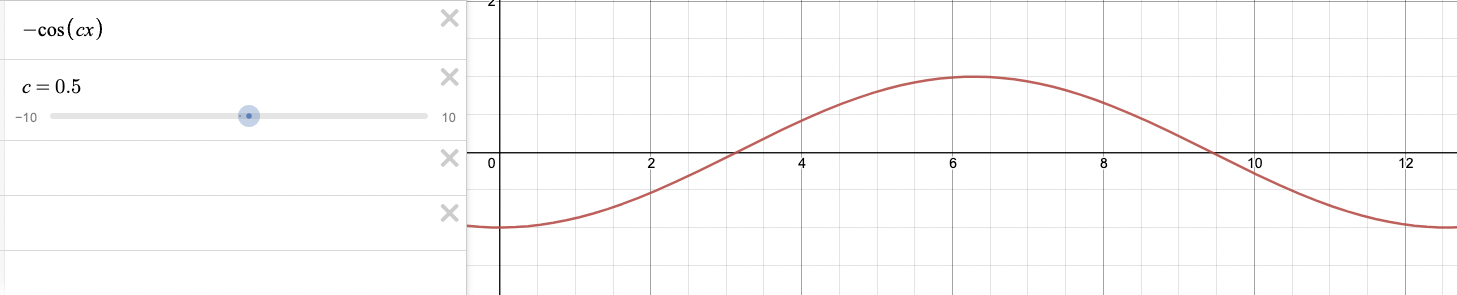

In [54]:
-np.cos(0.5*df_train.MoSold)

1     -0.070737
2     -0.540302
3     -0.708670
4      0.801144
5     -0.708670
         ...   
759    0.801144
760    0.989992
761    0.653644
762    0.936457
763    0.210796
Name: MoSold, Length: 2580, dtype: float64

In [55]:
(-np.cos(0.5*df_train.MoSold)).describe()
#after the transformation, the min is closed to -1 and the max is closed to 1

count    2580.000000
mean        0.388439
std         0.635138
min        -0.960170
25%        -0.070737
50%         0.653644
75%         0.936457
max         0.989992
Name: MoSold, dtype: float64

In [56]:
df_train.MoSold=-np.cos(0.5*df_train.MoSold)

# Encode Categoical Columns (after ensuring the dtype of those columns is string)

In [57]:
df_train=pd.get_dummies(df_train, drop_first=True)

In [58]:
df_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,Pav

# Standardization/Standard Scaling

In [59]:
standard=StandardScaler() #give each column the same range of values and centered around 0
standard.fit(df_train)
df_train=pd.DataFrame(standard.transform(df_train), index=df_train.index, columns=df_train.columns)

In [60]:
df_train

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,Pav

In [61]:
#In production, use pipeline to encode and standard scale
#pd.get_dummies(df_test)
#
#df_dummmied=pd.get_dummies()
#pipe = Pipeline(
#    [("standardize", StandardScaler()), ("df_dummmied", df_dummmied)])

# Target Transformation

<AxesSubplot:>

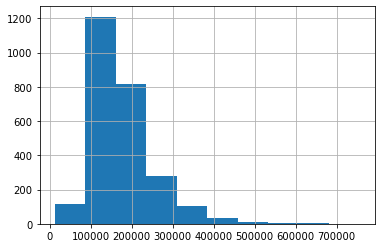

In [62]:
target.hist()
#the target Sale Price is right skewed

/home/indigon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/indigon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


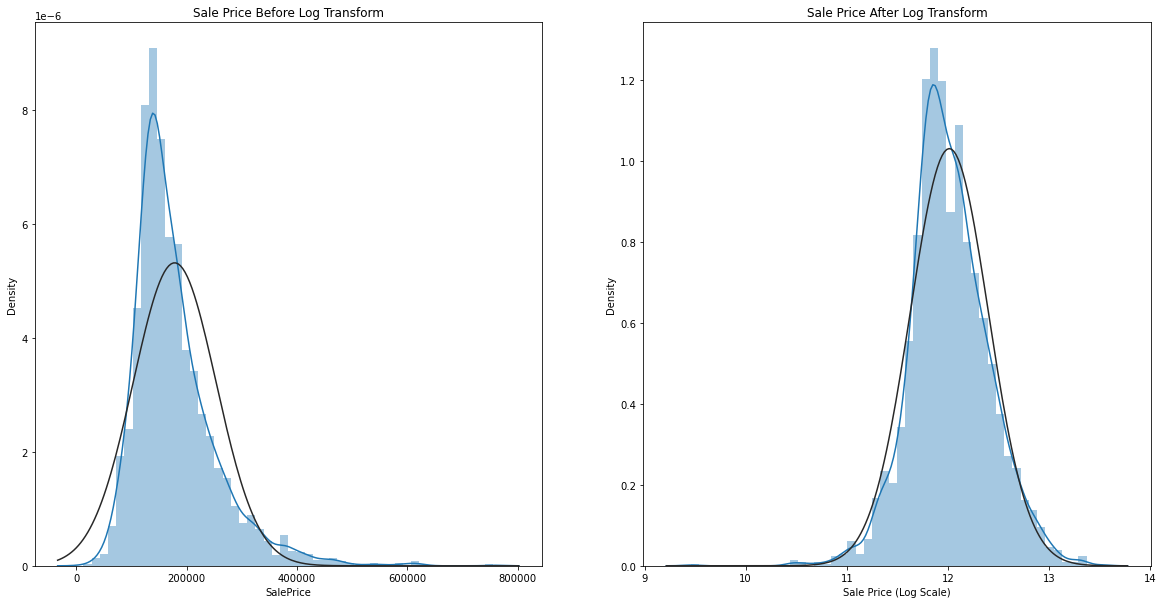

In [63]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Sale Price Before Log Transform")
sns.distplot(target,fit=scipy.stats.norm)
#the data's density plot does not lie up with a normal distrubtion very well

plt.subplot(1, 2, 2)
plt.title("Sale Price After Log Transform")
sns.distplot(np.log(target),fit=scipy.stats.norm)
plt.xlabel("Sale Price (Log Scale)")
#the data's density plot fits much better with a normal distrubtion after the log transmation
plt.show()

In [64]:
log_target=np.log(target)
#We're going to predict on the log Sale Price

In [65]:
#After making prediction with our modeals, 
#we need get back to the original Sale Price by exponentiating
np.exp(log_target)

1      126000.0
2      139500.0
3      124900.0
4      114000.0
5      227000.0
         ...   
759    121000.0
760    139600.0
761    145000.0
762    217500.0
763    215000.0
Name: SalePrice, Length: 2580, dtype: float64

# Feature Selection (Forward Stepwise)

In [66]:
#write a for loop for feature selectiopn 
#or use lasso to select the features 

In [67]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
#from here 
#https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

In [68]:
import statsmodels.api as sm

In [69]:
# forward_selected_features=forward_selection(df_train, log_target, significance_level=0.001)
forward_selected_features = ['GrLivArea',
 'OverallQual',
 'BsmtFinSF1',
 'YearBuilt',
 'LotArea',
 'OverallCond',
 'TotalBsmtSF',
 'BedroomAbvGr',
 'GarageCars',
 'Neighborhood_Crawfor',
 'KitchenAbvGr',
 'HeatingQC_TA',
 'Condition1_Norm',
 'BsmtFullBath',
 'Functional_Typ',
 'Fireplaces',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'Neighborhood_GrnHill',
 'BsmtExposure_Gd',
 'Condition2_PosN',
 'Neighborhood_Somerst',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'MSSubClass_160',
 'Neighborhood_NoRidge',
 'SaleCondition_Family',
 'GarageCond_Fa',
 'Exterior1st_BrkFace',
 'YearRemodAdd',
 'ExterCond_Fa',
 'Neighborhood_BrkSide',
 'BsmtQual_Gd',
 'Neighborhood_Edwards',
 'Functional_Maj2',
 'MSSubClass_85',
 'ScreenPorch',
 'BsmtQual_TA',
 'Condition1_PosN',
 'CentralAir_Y',
 'BsmtQual_Fa',
 'BsmtFinType1_Unf',
 'MSSubClass_90',
 'BldgType_Duplex',
 'Functional_Sal',
 'SaleCondition_Partial',
 'SaleCondition_Normal']

In [70]:
forward_selected_features

['GrLivArea',
 'OverallQual',
 'BsmtFinSF1',
 'YearBuilt',
 'LotArea',
 'OverallCond',
 'TotalBsmtSF',
 'BedroomAbvGr',
 'GarageCars',
 'Neighborhood_Crawfor',
 'KitchenAbvGr',
 'HeatingQC_TA',
 'Condition1_Norm',
 'BsmtFullBath',
 'Functional_Typ',
 'Fireplaces',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'Neighborhood_GrnHill',
 'BsmtExposure_Gd',
 'Condition2_PosN',
 'Neighborhood_Somerst',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'MSSubClass_160',
 'Neighborhood_NoRidge',
 'SaleCondition_Family',
 'GarageCond_Fa',
 'Exterior1st_BrkFace',
 'YearRemodAdd',
 'ExterCond_Fa',
 'Neighborhood_BrkSide',
 'BsmtQual_Gd',
 'Neighborhood_Edwards',
 'Functional_Maj2',
 'MSSubClass_85',
 'ScreenPorch',
 'BsmtQual_TA',
 'Condition1_PosN',
 'CentralAir_Y',
 'BsmtQual_Fa',
 'BsmtFinType1_Unf',
 'MSSubClass_90',
 'BldgType_Duplex',
 'Functional_Sal',
 'SaleCondition_Partial',
 'SaleCondition_Normal']

In [71]:
len(forward_selected_features)

47

In [72]:
df_train_final=pd.DataFrame()

In [73]:
for feature in forward_selected_features:
    df_train_final[feature]=df_train[feature]
df_train_final.shape


(2580, 47)

# EDA/Multiple Linear Regression/No Train-Test-Split/No Cross Validation

In [74]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
ols_no_transformed_feature = linear_model.LinearRegression()
ols_no_transformed_feature.fit(df_train_final,target)

LinearRegression()

In [75]:
ols_no_transformed_feature.score(df_train_final,target)

0.8978403178488172

In [76]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
ols = linear_model.LinearRegression()
ols.fit(df_train_final,log_target)

LinearRegression()

In [77]:
ols.score(df_train_final,log_target)

0.9337425336682272

In [78]:
ols.coef_.shape #the number of elements match the number of columns 

(47,)

In [79]:
#str(np.round(ols.coef_, 3))

In [80]:
df_train.shape

(2580, 281)

In [81]:
log_target.shape

(2580,)

# EDA/Multiple Linear Regression/With Train-Test-Split/No Cross Validation

In [82]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_final, log_target, test_size=0.3, random_state=0)

In [83]:
ols_split = LinearRegression()
ols_split.fit(X_train, y_train)
ols_split.score(X_train, y_train)

0.9390948973587008

In [84]:
ols_split.score(X_test, y_test)

0.9168648145137545

# EDA/Multiple Linear Regression/With Cross Validation

In [85]:
ols_split = LinearRegression()
ols_split.fit(X_train, y_train)
ols_split.score(X_train, y_train)
print("Train Score", ols_split.score(X_train, y_train))
print("Test Score", ols_split.score(X_test, y_test))

Train Score 0.9390948973587008
Test Score 0.9168648145137545


In [86]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ols_split, X_train, y_train, cv=kfold)
print(scores)
np.mean(scores)

[ 8.72397470e-01 -6.77281584e+17  9.38629453e-01  8.44066753e-01
  9.45341035e-01  9.41965975e-01  9.47324838e-01  9.28906668e-01
  9.50946176e-01  9.32119127e-01]


-6.772815836333655e+16

In [88]:
ols_split.score(X_test, y_test)

0.9168648145137545

In [89]:
results=cross_val_score(ols_split, df_train_final, log_target, scoring="neg_mean_squared_error", cv=kfold)
np.mean(-results)

0.011344262845637595

<Figure size 1152x720 with 0 Axes>

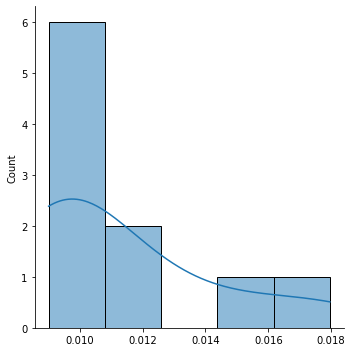

In [90]:
plt.figure(figsize=(16,10))
sns.displot(-results, kde=True)

In [91]:
df_raw.SalePrice

1      126000
2      139500
3      124900
4      114000
5      227000
        ...  
759    121000
760    139600
761    145000
762    217500
763    215000
Name: SalePrice, Length: 2580, dtype: int64

# Ridge Regression

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge=Ridge()

In [93]:
# ridge.fit(X_train, y_train)

In [94]:
# ridge_scores = cross_val_score(ridge, X_train, y_train, cv=kfold)
# print(ridge_scores)
# np.mean(ridge_scores)

In [95]:
# ridge.score(X_test, y_test)

# Bayesian Ridge Regression

In [96]:
# bayes_ridge = BayesianRidge()
# bayes_ridge.fit(X_train, y_train)
# bayes_ridge.score(X_test, y_test)

In [97]:
# cross_val_score(bayes_ridge, X_train, y_train)

In [98]:
# np.mean(cross_val_score(bayes_ridge, X_train, y_train))

In [99]:
# cross_val_score(bayes_ridge, X_train, y_train, cv = kfold)

In [100]:
# np.mean(cross_val_score(bayes_ridge, X_train, y_train, cv = kfold))

## The Coefficient Plot of Ridge Against Regularization/Penalization Strength $\alpha$

In [101]:
df_train_final.shape

(2580, 47)

In [102]:
alphas = np.arange(0,20)
coefs  = []
scores = [] #R^2
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(df_train_final, log_target)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(df_train_final, log_target))
coefs = pd.DataFrame(coefs, index = alphas, columns = df_train_final.columns)  
coefs.head()

,GrLivArea,OverallQual,BsmtFinSF1,YearBuilt,LotArea,OverallCond,TotalBsmtSF,BedroomAbvGr,GarageCars,Neighborhood_Crawfor,KitchenAbvGr,HeatingQC_TA,Condition1_Norm,BsmtFullBath,Functional_Typ,Fireplaces,MSZoning_C (all),MSZoning_RM,Neighborhood_GrnHill,BsmtExposure_Gd,Condition2_PosN,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_StoneBr,MSSubClass_160,Neighborhood_NoRidge,SaleCondition_Family,GarageCond_Fa,Exterior1st_BrkFace,YearRemodAdd,ExterCond_Fa,Neighborhood_BrkSide,BsmtQual_Gd,Neighborhood_Edwards,Functional_Maj2,MSSubClass_85,ScreenPorch,BsmtQual_TA,Condition1_PosN,CentralAir_Y,BsmtQual_Fa,BsmtFinType1_Unf,MSSubClass_90,BldgType_Duplex,Functional_Sal,SaleCondition_Partial,SaleCondition_Normal
0,0.148926,0.075341,0.043692,0.073062,0.038219,0.050969,0.039697,-0.010730,0.028674,0.020593,-0.010463,-0.011522,0.018684,0.014934,0.014025,0.013686,-0.015438,-0.016696,0.013045,0.018114,-0.016142,0.021858,0.015754,0.014760,-0.015108,0.013350,-0.005805,-0.009177,0.011906,0.017120,-0.009947,0.009498,-0.033103,-0.009298,-0.008991,0.006312,0.008174,-0.032389,0.007953,0.010065,-0.012822,0.020829,-0.003023,-0.006873,-0.005622,0.020944,0.019604
1,0.148728,0.075383,0.043502,0.072913,0.038217,0.050895,0.039742,-0.010638,0.028718,0.020589,-0.010441,-0.011538,0.018675,0.014950,0.014017,0.013735,-0.015435,-0.016701,0.013045,0.018127,-0.016122,0.021852,0.015774,0.014769,-0.015088,0.013367,-0.005814,-0.009185,0.011899,0.017187,-0.009954,0.009485,-0.032976,-0.009299,-0.008994,0.006303,0.008177,-0.032304,0.007952,0.010090,-0.012792,0.020650,-0.004953,-0.004953,-0.005627,0.020928,0.019572
2,0.148532,0.075425,0.043315,0.072765,0.038214,0.050821,0.039787,-0.010547,0.028761,0.020586,-0.010420,-0.011554,0.018666,0.014965,0.014008,0.013785,-0.015433,-0.016707,0.013045,0.018140,-0.016102,0.021847,0.015793,0.014778,-0.015068,0.013383,-0.005823,-0.009192,0.011892,0.017253,-0.009961,0.009471,-0.032849,-0.009300,-0.008998,0.006294,0.008181,-0.032220,0.007951,0.010114,-0.012762,0.020474,-0.004958,-0.004958,-0.005631,0.020913,0.019541
3,0.148336,0.075467,0.043130,0.072617,0.038212,0.050748,0.039831,-0.010457,0.028804,0.020582,-0.010398,-0.011570,0.018657,0.014980,0.014000,0.013834,-0.015430,-0.016712,0.013045,0.018153,-0.016083,0.021841,0.015813,0.014787,-0.015048,0.013399,-0.005833,-0.009200,0.011886,0.017319,-0.009968,0.009457,-0.032724,-0.009300,-0.009002,0.006285,0.008185,-0.032138,0.007950,0.010139,-0.012733,0.020300,-0.004964,-0.004964,-0.005636,0.020898,0.019509
4,0.148141,0.075507,0.042947,0.072470,0.038209,0.050675,0.039874,-0.010367,0.028847,0.020578,-0.010377,-0.011586,0.018648,0.014995,0.013991,0.013883,-0.015428,-0.016717,0.013045,0.018166,-0.016063,0.021836,0.015833,0.014795,-0.015029,0.013414,-0.005842,-0.009207,0.011879,0.017385,-0.009975,0.009444,-0.032600,-0.009301,-0.009005,0.006276,0.008188,-0.032056,0.007949,0.010164,-0.012705,0.020127,-0.004969,-0.004969,-0.005640,0.020882,0.019478


Text(0, 0.5, 'slope values')

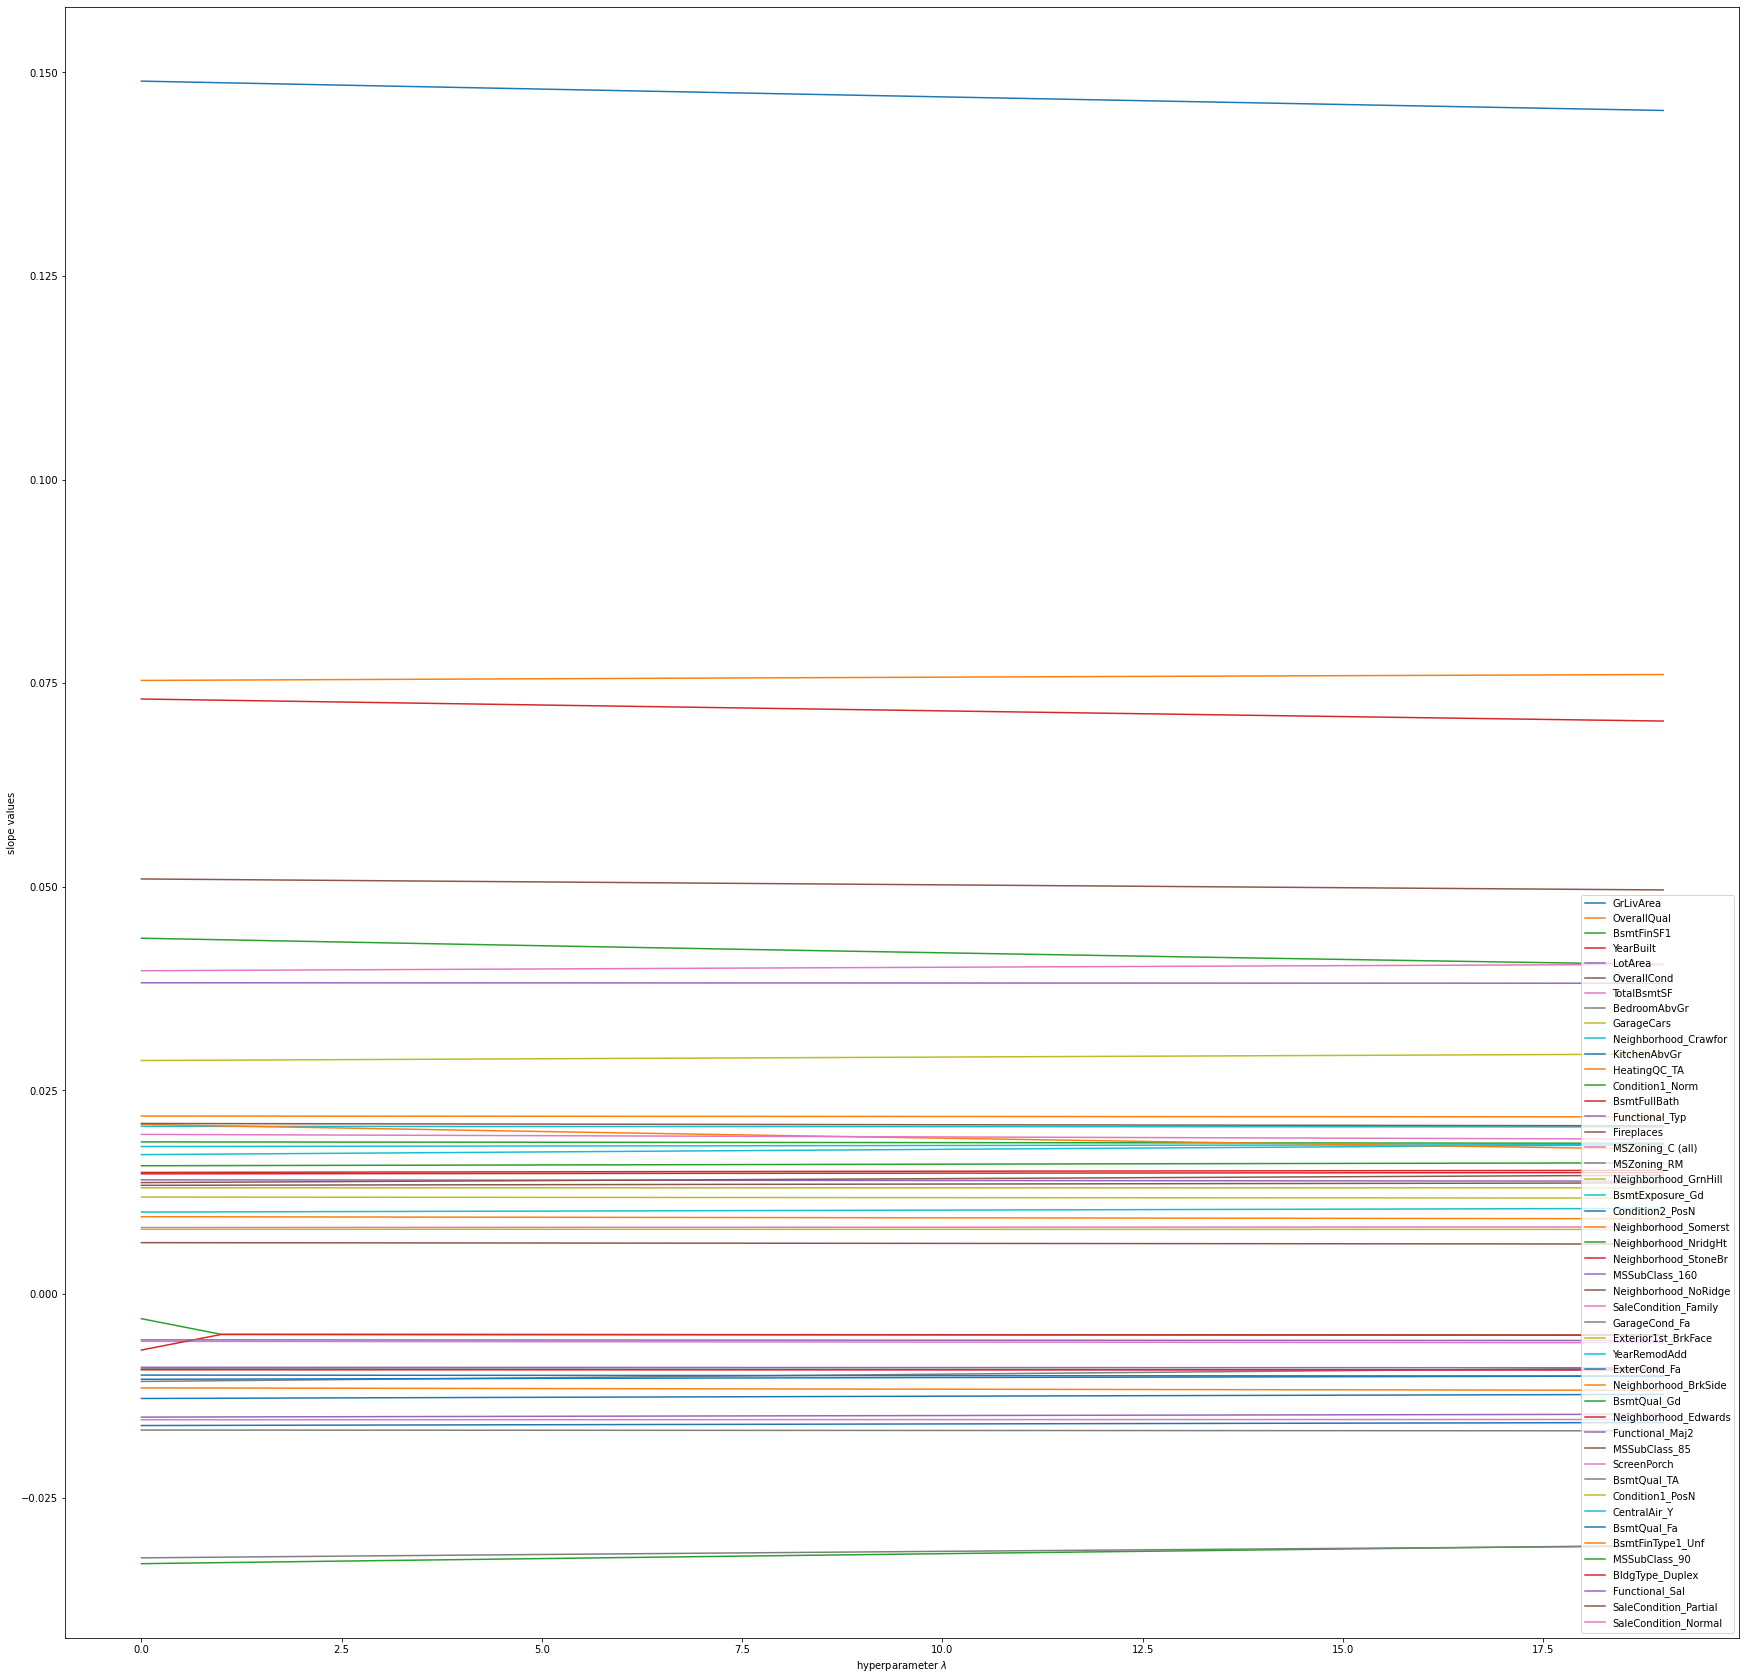

In [103]:
plt.rcParams['figure.figsize'] = (30,30)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

# Lasso Regression

In [104]:
df_train.shape

(2580, 281)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, log_target, test_size=0.3, random_state=0)

In [106]:
lasso=Lasso()

In [107]:
lasso.fit(X_train, y_train)

Lasso()

In [108]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=kfold)
print(lasso_scores)
np.mean(lasso_scores)

[-0.00130155 -0.00083211 -0.00557317 -0.00116643 -0.00070391 -0.00592124
 -0.00510642 -0.01087238 -0.02174233 -0.00112829]


-0.005434783019739342

In [109]:
lasso.score(X_test, y_test)

-5.0100953733256404e-05

In [110]:
alphas = np.logspace(-8,2,11)

In [111]:
alphas

array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02])

In [112]:
alphas = np.logspace(-8,2,11)
scores= []
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(df_train, log_target)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = df_train.columns)  
coefs_lasso.head()

/home/indigon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.367342443182592, tolerance: 0.038691428912490874
  model = cd_fast.enet_coordinate_descent(
/home/indigon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.29184952864455, tolerance: 0.038691428912490874
  model = cd_fast.enet_coordinate_descent(
/home/indigon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.566138275834374, tolerance: 0.038691428912490874
  model = cd_fast.enet_coordinate_descent(
/home/indigon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,Pav

In [113]:
# coefs_lasso[coefs_lasso.columns==0]

(0.0, 5.0)

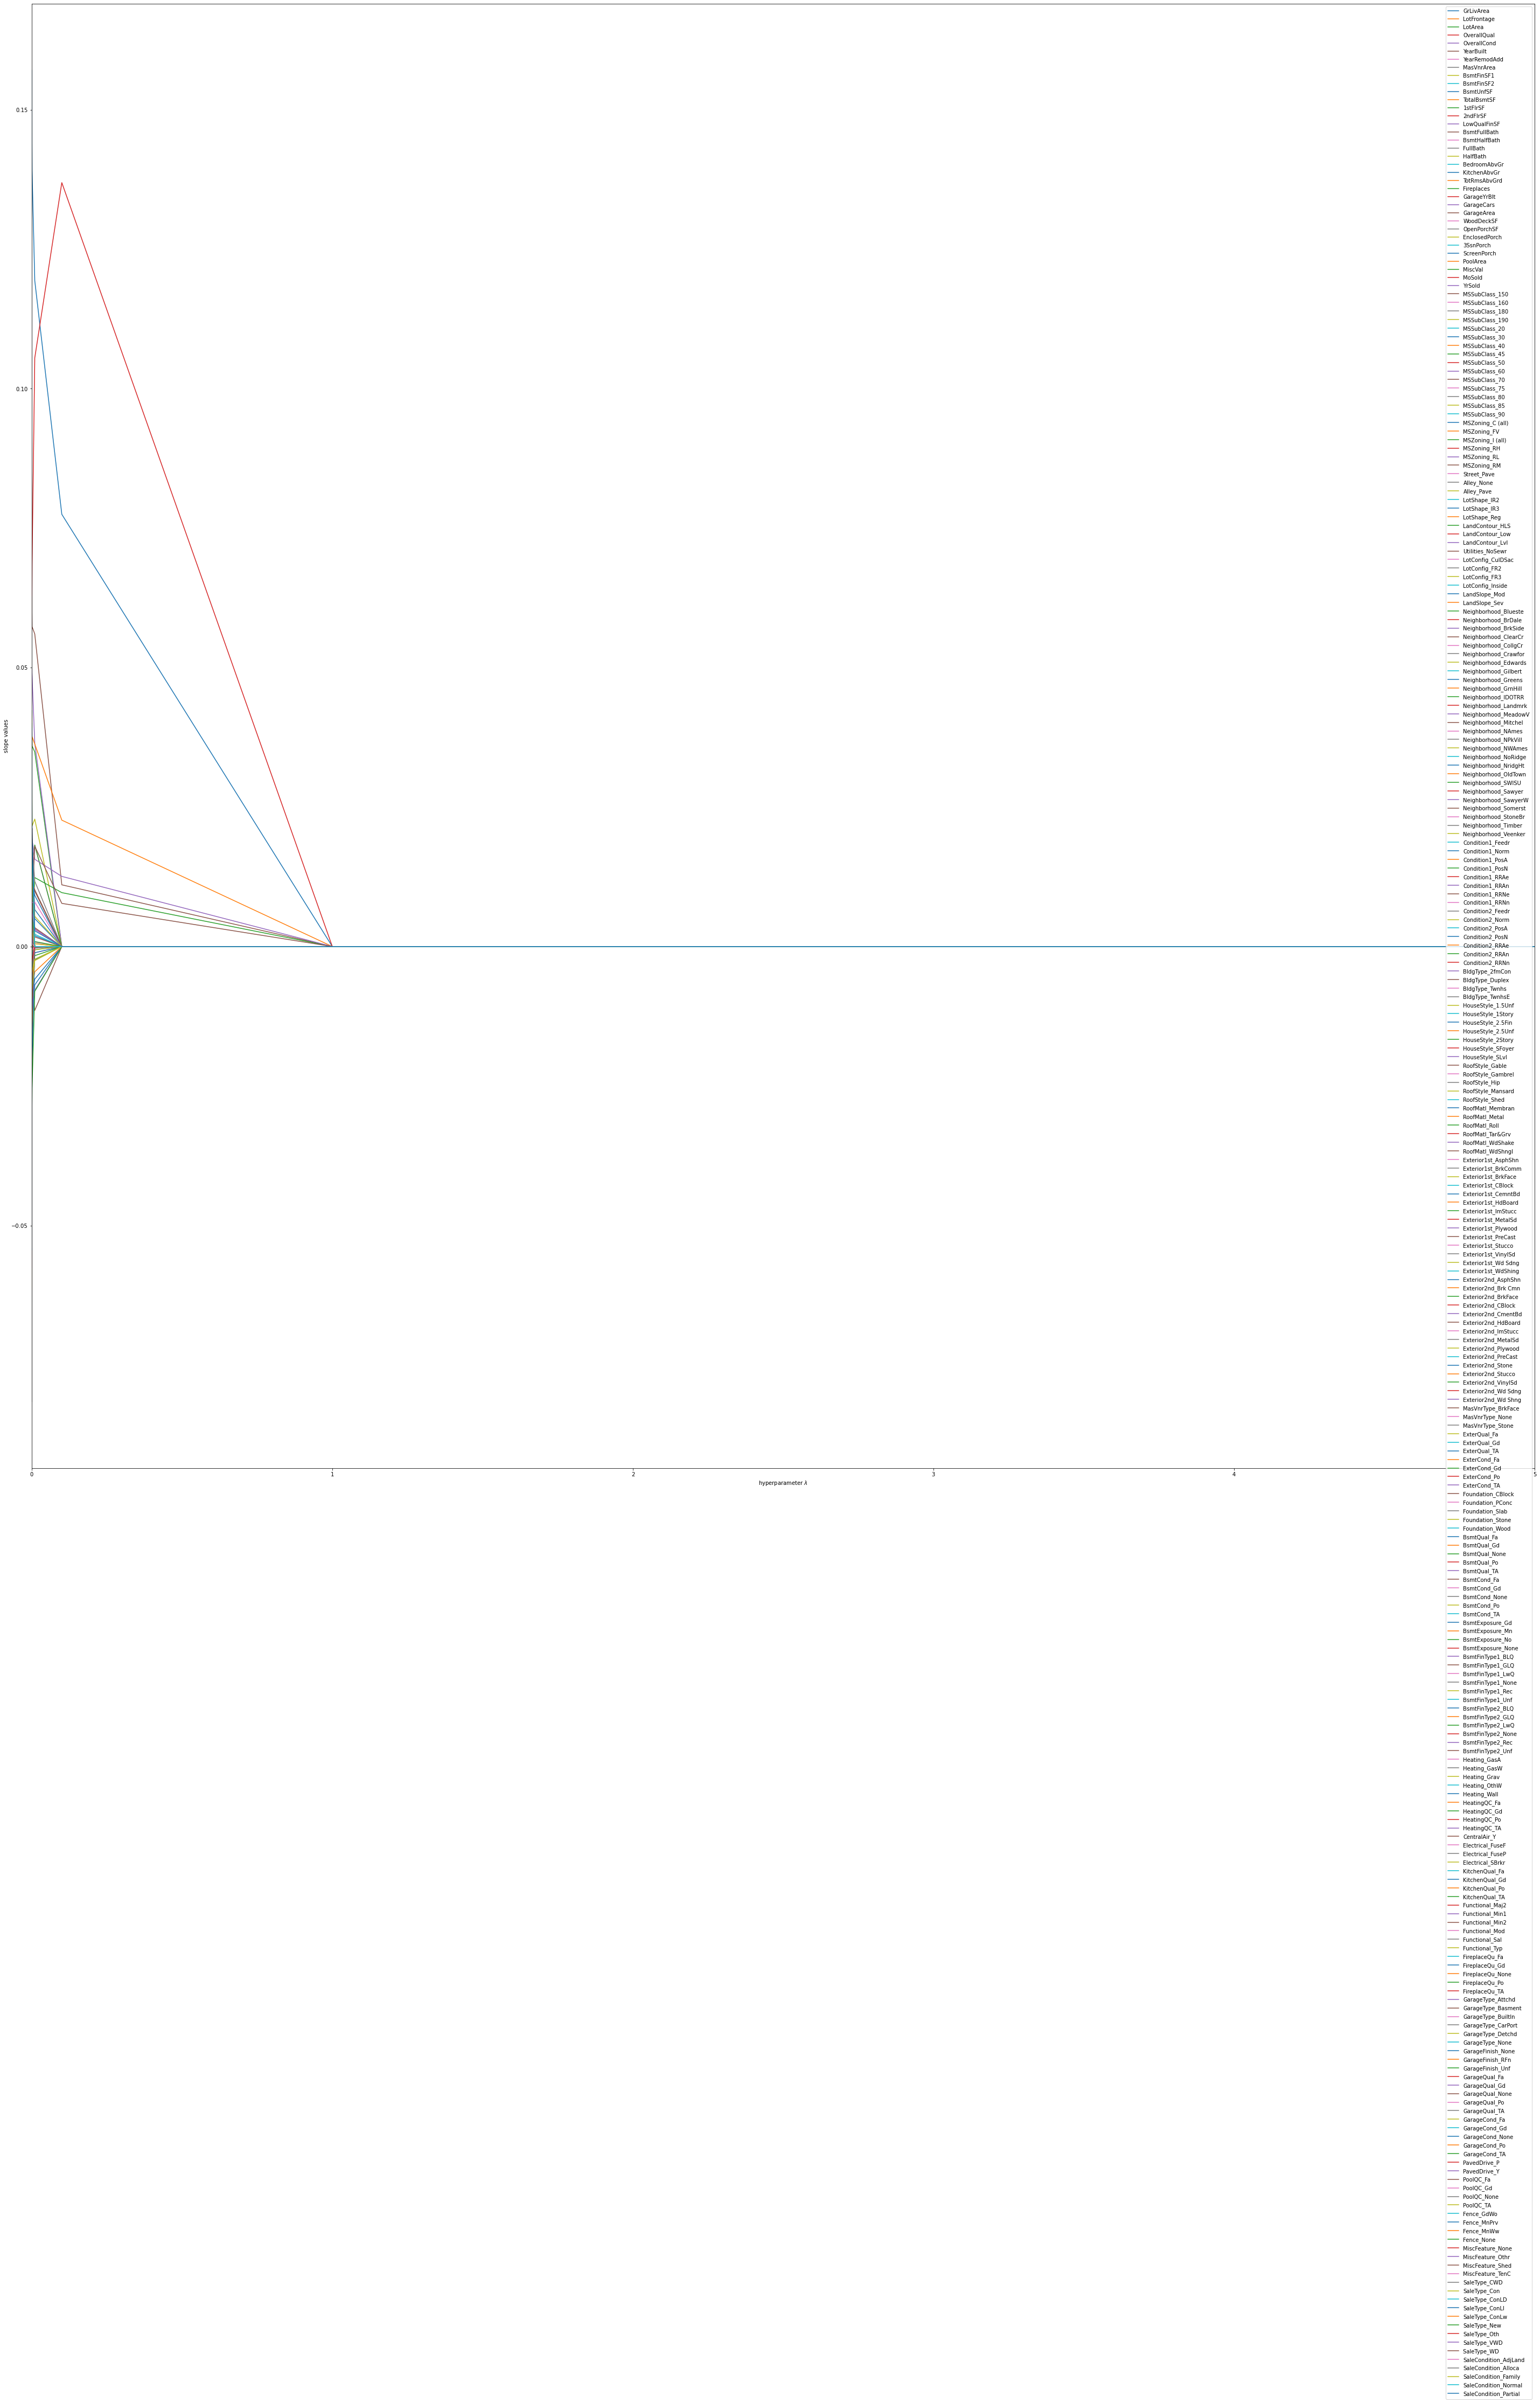

In [114]:
plt.figure(figsize = (50, 50))
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1) 
plt.xlim(0,5)


In [115]:
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 1, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [116]:
ridge_scores_train.mean()

0.9537031632010569

In [117]:
ridge_scores_test.mean()

0.911202392282191

In [118]:
ridge_scores_train.min()

0.9536734297136534

In [119]:
ridge_scores_test.min()

0.9094127700322154

In [120]:
lasso_scores_train.mean()

0.16276720030227002

In [121]:
lasso_scores_train.min()

0.0

In [122]:
lasso_scores_test.mean()

0.1568075115873696

In [123]:
lasso_scores_test.min()

-5.0100953733256404e-05

# [Come back] Grid Search `GridSearchCV`

In [124]:
#grid search cv to select a lamdba for us - best params
#remaining features that are non-zero 

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
# params = np.arange(0.0000001, 0.000002, 0.0000001)
# dct = {'alpha_1': params, 'alpha_2': params, 'lambda_1': params, 'lambda_2': params}
# grid = GridSearchCV(bayes_ridge, dct)

In [127]:
# grid.fit(df_train_final, log_target)

In [128]:
# grid.best_params_

In [129]:
# grid.best_score_

In [130]:
# lasso_alphas = np.arange(0.01, 10.0, 0.01)

In [131]:
# search_lasso = Lasso()

In [132]:
# search_lasso.fit(df_train_final, log_target)

In [133]:
# lasso_grid = GridSearchCV(search_lasso, {'alpha': lasso_alphas})

In [134]:
# lasso_grid.fit(df_train_final, log_target)

In [135]:
# lasso_grid.best_params_

In [136]:
# lasso_grid.best_score_

In [137]:
# import helper

In [138]:
# helper.pickle_it(grid, 'pruned_feature_bayes_ridge')

In [139]:
# lasso_alphas = np.arange(0.0001, 0.0011, 0.0001)

In [140]:
# low_lasso = Lasso()

In [141]:
# low_lasso.fit(df_train_final, log_target)

In [142]:
# low_lasso_grid = GridSearchCV(low_lasso, {'alpha': lasso_alphas})

In [143]:
# low_lasso_grid.fit(df_train_final, log_target)

In [144]:
# low_lasso_grid.best_params_

In [145]:
# low_lasso_grid.best_score_

In [146]:
# best_lasso = Lasso(alpha = 0.0002)

In [147]:
# best_lasso.fit(df_train_final, log_target)

In [148]:
# best_lasso.get_params()

In [149]:
# best_lasso.score(df_train_final, log_target)

In [150]:
# helper.pickle_it(best_lasso, 'best_lasso')

In [151]:
# import pickle

In [152]:
# with open('pruned_feature_bayes_ridge', 'rb') as file:
#     loaded = pickle.load(file)

In [153]:
# loaded.best_params_

In [154]:
# loaded.best_score_

In [155]:
# new_bayes_ridge = BayesianRidge(alpha_1 = loaded.best_params_['alpha_1'], \
#                                 alpha_2 = loaded.best_params_['alpha_2'], \
#                                 lambda_1 = loaded.best_params_['lambda_1'], \
#                                 lambda_2 = loaded.best_params_['lambda_2'])

In [156]:
# new_bayes_ridge.fit(X_train, y_train)

In [157]:
# new_bayes_ridge.score(X_train, y_train)

In [158]:
# new_bayes_ridge.score(X_test, y_test)

In [159]:
# cross_val_score(new_bayes_ridge, X_test, y_test).mean()

In [160]:
# cross_val_score(new_bayes_ridge, X_test, y_test).min()

In [161]:
# cross_val_score(new_bayes_ridge, X_test, y_test).max()

In [162]:
# cross_val_score(best_lasso, X_test, y_test).mean()

In [163]:
# cross_val_score(best_lasso, X_test, y_test).min()

In [164]:
# cross_val_score(best_lasso, X_test, y_test).max()

In [165]:
# best_lasso.coef_

In [166]:
# more_params_lasso = Lasso()

In [167]:
# big_lasso_params = {'alpha': np.arange(0.0001, 0.0011, 0.0001), \
#                     'max_iter': np.arange(900, 1500), \
#                     'tol': np.arange(0.00001, 0.0002, 0.00001)}

In [168]:
# real_best_lasso = GridSearchCV(more_params_lasso, big_lasso_params)

In [169]:
# real_best_lasso.fit(df_train_final, log_target)
# import helper
# helper.pickle_it(real_best_lasso, 'real_best_lasso')

In [170]:
# import pickle
# with open('real_best_lasso', 'rb') as file:
#     real_best_lasso = pickle.load(file)

In [171]:
# real_best_lasso.best_score_

In [172]:
# real_best_lasso.score(df_train_final, log_target)

In [173]:
# real_best_lasso.best_estimator_

In [174]:
# real_best_lasso = Lasso(alpha = 0.0002, max_iter = 900, tol = 0.00017)

In [175]:
# real_best_lasso.fit(df_train_final, log_target)

In [176]:
# cross_val_score(real_best_lasso, df_train_final, log_target).mean()

In [177]:
# cross_val_score(real_best_lasso, X_test, y_test).mean()

In [178]:
# params = np.arange(0.0000001, 0.000002, 0.0000001)
# dct = {'alpha_1': params, \
#        'alpha_2': params, \
#        'lambda_1': params, \
#        'lambda_2': params, \
#        'tol': np.arange(0.0001, 0.002, 0.0001), \
#        'n_iter': np.arange(100, 400)}

In [179]:
# real_best_bayes_ridge = GridSearchCV(BayesianRidge(), dct)

In [180]:
# real_best_bayes_ridge.fit(X_train, y_train)

# import helper
# helper.pickle_it(real_best_bayes_ridge, 'real_best_bayes_ridge')

# Non-Linear Models
## CatBoost
## Evaluate with Cross Validation 

In [181]:
df_train_final.shape

(2580, 47)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df_train_final, log_target, test_size=0.3, random_state=0)

In [183]:
from catboost import CatBoostRegressor

In [184]:
cb=CatBoostRegressor(verbose=0)

In [185]:
cb.fit(X_train, y_train)

In [186]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(cb, X_train, y_train, cv=kfold)
#Both training and validation were done within the training data
np.mean(results)

0.926769602072197

In [187]:
cb.score(X_test, y_test)

0.9179712076370234

In [188]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(cb, df_train_final, log_target, scoring="neg_mean_squared_log_error", cv=kfold)
np.mean(-results)

6.553104099349704e-05

In [189]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(cb, df_train_final, log_target, scoring="neg_mean_squared_error", cv=kfold)
np.mean(-results)

0.010532939749797915

In [190]:
np.sqrt(np.mean(-results))

0.10263011132118056

In [191]:
-results

array([0.0096427 , 0.00966852, 0.01960278, 0.00822669, 0.0107378 ,
       0.01382743, 0.00874541, 0.0068338 , 0.00852194, 0.00952233])

<Figure size 1152x720 with 0 Axes>

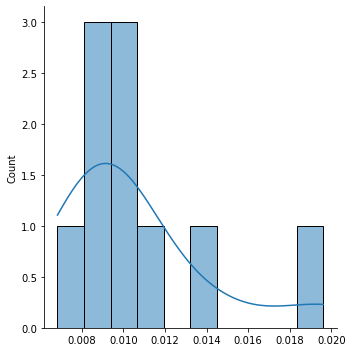

In [192]:
plt.figure(figsize=(16,10))
sns.displot(-results, bins=10, kde=True)

In [193]:
np.exp(np.sqrt(np.mean(-results)))

1.108081466474459

# SVR

In [194]:
from sklearn import svm

In [195]:
dct = {'C': np.arange(0.1, 1.5, 0.1), \
       'tol': np.arange(0.0001, 0.0002), \
       'epsilon': np.arange(0.01, 0.2, 0.01)}
rbf = GridSearchCV(svm.SVR(), dct)

In [196]:
x_train, x_test, y_train, y_test = train_test_split(df_train_final, log_target, test_size = 0.3, random_state = 0)

In [197]:
# import pickle
# import helper

# rbf.fit(x_train, y_train)

# helper.pickle_it(rbf, 'rbf_grid')

In [198]:
# rbf.score(x_test, y_test)

In [199]:
# rbf.score(x_train, y_train)

In [200]:
# rbf.best_estimator_

Looks like the best estimators were the lowest values for both epsilon and tolerance that we tried. Let's do this again with lower parameters for them

In [201]:
# dct = {'C': np.arange(0.1, 1.5, 0.1), \
#        'tol': np.arange(0.00001, 0.0002, 0.00001), \
#        'epsilon': np.arange(0.001, 0.011, 0.001)}
# rbf = GridSearchCV(svm.SVR(), dct)

In [202]:
# import pickle
# import helper

# rbf.fit(x_train, y_train)

# helper.pickle_it(rbf, 'low_rbf_grid')

In [203]:
# rbf.best_estimator_

Much better

In [204]:
# rbf.score(x_train, y_train)

In [205]:
# rbf.score(x_test, y_test)

Not a hude improvement on test score. Maybe the linear kernel?

In [206]:
# dct = {'C': np.arange(0.1, 1.5, 0.1), \
#        'tol': np.arange(0.00001, 0.0002, 0.00001), \
#        'epsilon': np.arange(0.001, 0.011, 0.001)}
# linear = GridSearchCV(svm.SVR(kernel = 'linear'), dct)

In [207]:
# import pickle
# import helper

# linear.fit(x_train, y_train)

# helper.pickle_it(linear, 'linear_grid')

In [208]:
# linear.score(x_test, y_test)

In [209]:
# linear.best_estimator_

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
# rf = RandomForestRegressor()

# dct = {'bootstrap': [True, False], \
#        'max_depth': [*np.arange(10, 101, 1)] + [None], \
#        'max_features':['auto', 'sqrt'], \
#        'n_estimators': np.arange(50, 151)}

In [212]:
# rf_grid = GridSearchCV(rf, dct)

In [213]:
# rf_grid.fit(x_train, y_train)

In [214]:
# rf_grid.best_estimator_

In [215]:
import pickle

In [216]:
# cross_val_score(rf, x_train, y_train, cv = 10).mean()

In [217]:
# rf_grid.score(x_test, y_test)

In [218]:
with open('low_rbf_grid', 'rb') as file:
    rbf = pickle.load(file)

In [219]:
cross_val_score(rbf.best_estimator_, x_train, y_train, cv = 10).mean()

0.8935378718991001

In [220]:
rbf.best_estimator_.score(x_test, y_test)

0.8677668546612735

In [221]:
with open('linear_grid', 'rb') as file:
    linear = pickle.load(file)

In [222]:
cross_val_score(linear.best_estimator_, x_train, y_train, cv = 10).mean()

0.9211023755139444

In [223]:
linear.best_estimator_.score(x_test, y_test)

0.9181635345094471

In [224]:
from sklearn.metrics import mean_squared_error

In [225]:
# np.sqrt((-cross_val_score(rf_grid.best_estimator_, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 10))).mean()

In [226]:
# mean_squared_error(y_test, rf_grid.predict(x_test), squared = False)

In [227]:
np.sqrt((-cross_val_score(rbf.best_estimator_, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 10))).mean()

0.12352849106856789

In [228]:
mean_squared_error(y_test, rbf.best_estimator_.predict(x_test), squared = False)

0.14399050827130228

In [229]:
np.sqrt((-cross_val_score(linear.best_estimator_, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 10))).mean()

0.10558468144192774

In [230]:
mean_squared_error(y_test, linear.best_estimator_.predict(x_test), squared = False)

0.11327579857119587

In [231]:
with open('best_bayes_ridge', 'rb') as file:
    bayes_ridge = pickle.load(file)

In [232]:
bayes_ridge.get_params()

{'alpha_1': 1e-07,
 'alpha_2': 1.9e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1.9e-06,
 'lambda_2': 1e-07,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': False,
 'tol': 0.001,
 'verbose': False}

In [233]:
best_bayes_ridge = BayesianRidge(alpha_1 = 1e-07, alpha_2 = 1.9e-06, lambda_1 = 1.9e-06, lambda_2 = 1e-07)

In [234]:
best_bayes_ridge.fit(x_train, y_train)

BayesianRidge(alpha_1=1e-07, alpha_2=1.9e-06, lambda_1=1.9e-06, lambda_2=1e-07)

In [235]:
cross_val_score(best_bayes_ridge, x_train, y_train, cv = 10).mean()

0.9197034480090599

In [236]:
best_bayes_ridge.score(x_test, y_test)

0.9167257004894851

In [237]:
np.sqrt((-cross_val_score(best_bayes_ridge, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 10))).mean()

0.10641791313347201

In [238]:
mean_squared_error(y_test, best_bayes_ridge.predict(x_test), squared = False)

0.1142665709255464

In [240]:
with open ('random_forest_grid', 'rb') as file:
    rf = pickle.load(file)

In [241]:
rf.best_estimator_.feature_importances_

array([0.15346167, 0.17097936, 0.05190253, 0.07879932, 0.03965745,
       0.02029136, 0.08749025, 0.01692865, 0.07280026, 0.00381884,
       0.0017994 , 0.01276883, 0.0030357 , 0.00876806, 0.0027622 ,
       0.05837747, 0.00184187, 0.01114035, 0.0003246 , 0.00688285,
       0.00017546, 0.00182763, 0.01201662, 0.00127476, 0.00210778,
       0.00545027, 0.00096171, 0.00280336, 0.00226796, 0.07574914,
       0.00276973, 0.00109775, 0.01870259, 0.00310579, 0.00036338,
       0.00044242, 0.00408074, 0.02799293, 0.0004937 , 0.01953668,
       0.00240481, 0.00402084, 0.00096794, 0.00107958, 0.00057192,
       0.00157047, 0.00233298])

<BarContainer object of 47 artists>

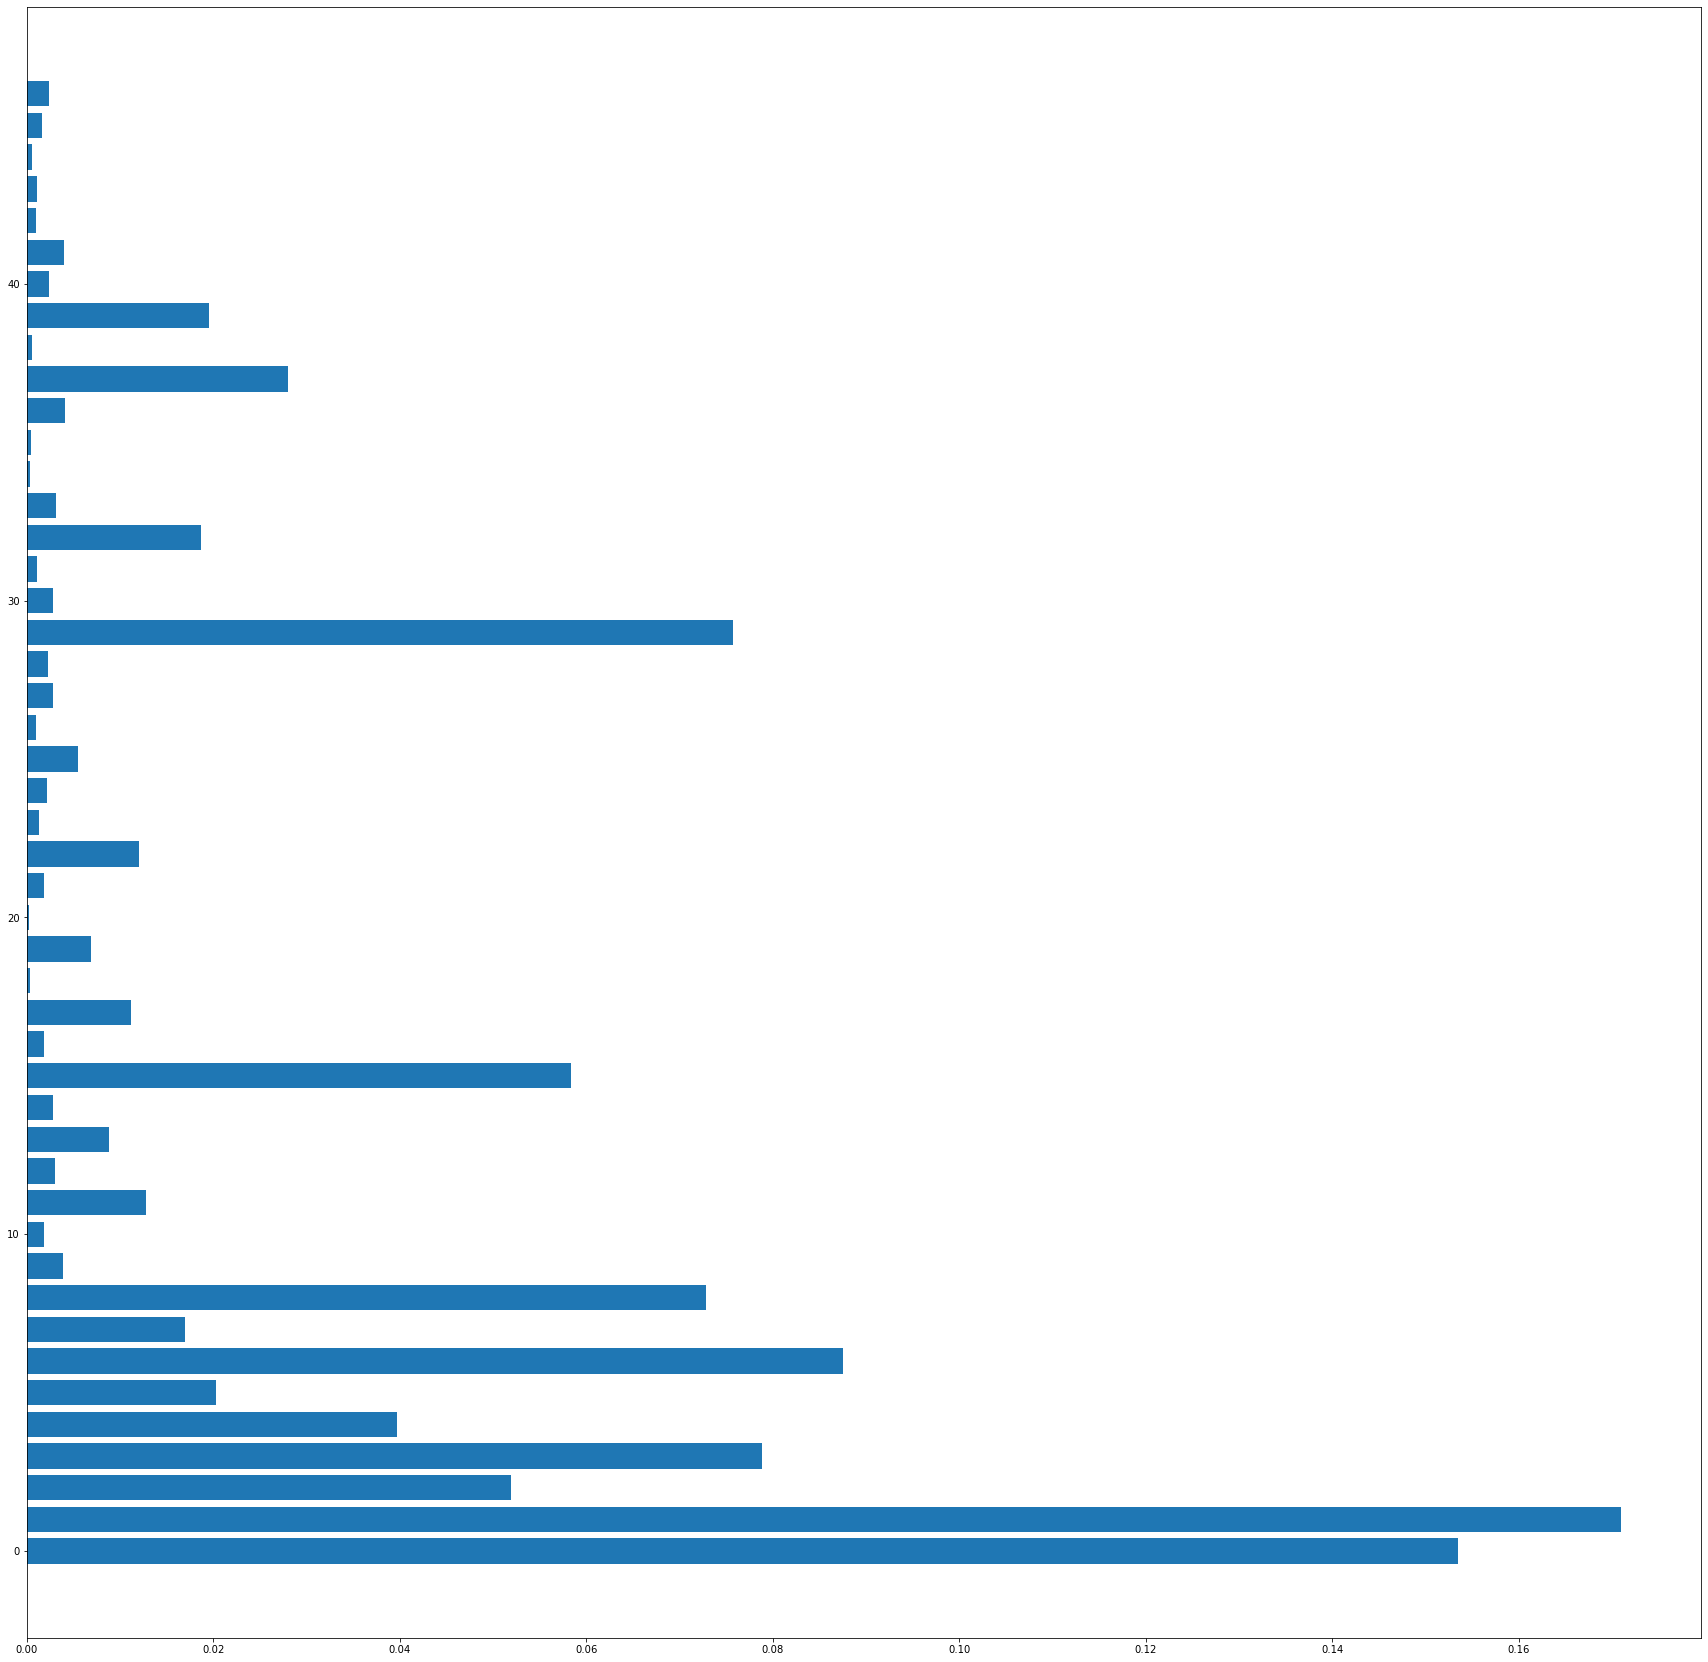

In [244]:
plt.barh(range(len(rf.best_estimator_.feature_importances_)), rf.best_estimator_.feature_importances_)